# A Post-Crisis Analysis of Housing Demand
### By Jason Kim
StreetEasy is New York City's leading online marketplace for real estate. It started publishing monthly time-series sales and rental data back in 2009, right after the financial crisis. We will be working with 'Median Sales Price' data in 'All Home Types', which includes information from all five boroughs.

The New York City Department of Buildings (DoB) contains the city's property records for regulation and compliance of buildings. This includes permit issuance for new building construction. We will be working with residential new buildings permit data, which includes addresses and permit issuance dates of new construction.

An analysis of StreetEasy and the Department of Buildings data will reveal trends in median prices of residential dwellings and new construction, respectively. Cross-comparing growth rates in prices and new construction can give us insights to the demand of new residential complexes and answer the question: *Is new construction warranted?*

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import re

%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Today:  2016-12-22


In [2]:
# Read in the StreetEasy data
url1 = 'https://raw.githubusercontent.com/codejkim/StreetEasy/master/'
url2 = 'closing_time_series_prices_All_Types_Any_Bedrooms.csv'
url = url1 + url2
se = pd.read_csv(url)

In [3]:
area = se.set_index('Area')
area = area.drop('Boro', 1) # Drop the columns we don't need
area = area.drop('AreaType', 1) 
boroughs = ['NYC', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
area = area.ix[boroughs] # selects all 5 boroughs & NYC from index
areaT = area.T

The following graphs show the price trends in NYC and the five boroughs. There seems to be a volatile, yet upwards trend in median sales prices in New York City. Breaking it down by boroughs reveals the following:
* The **Bronx** did not perform very well after the housing crisis, shown by the downward trend and subsequent stabilization in prices.
* **Brooklyn** saw a high increase in prices, especially since 2014.
* **Manhattan** also experienced a pretty steady increase in prices.
* **Queens** had a large drop in prices, but appears to have bounced back since 2014.
* Starting from late 2010, when **Staten Island** data was available, we see high price volatility which stabilizes  after 2014.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117cb72b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117d88710>], dtype=object)

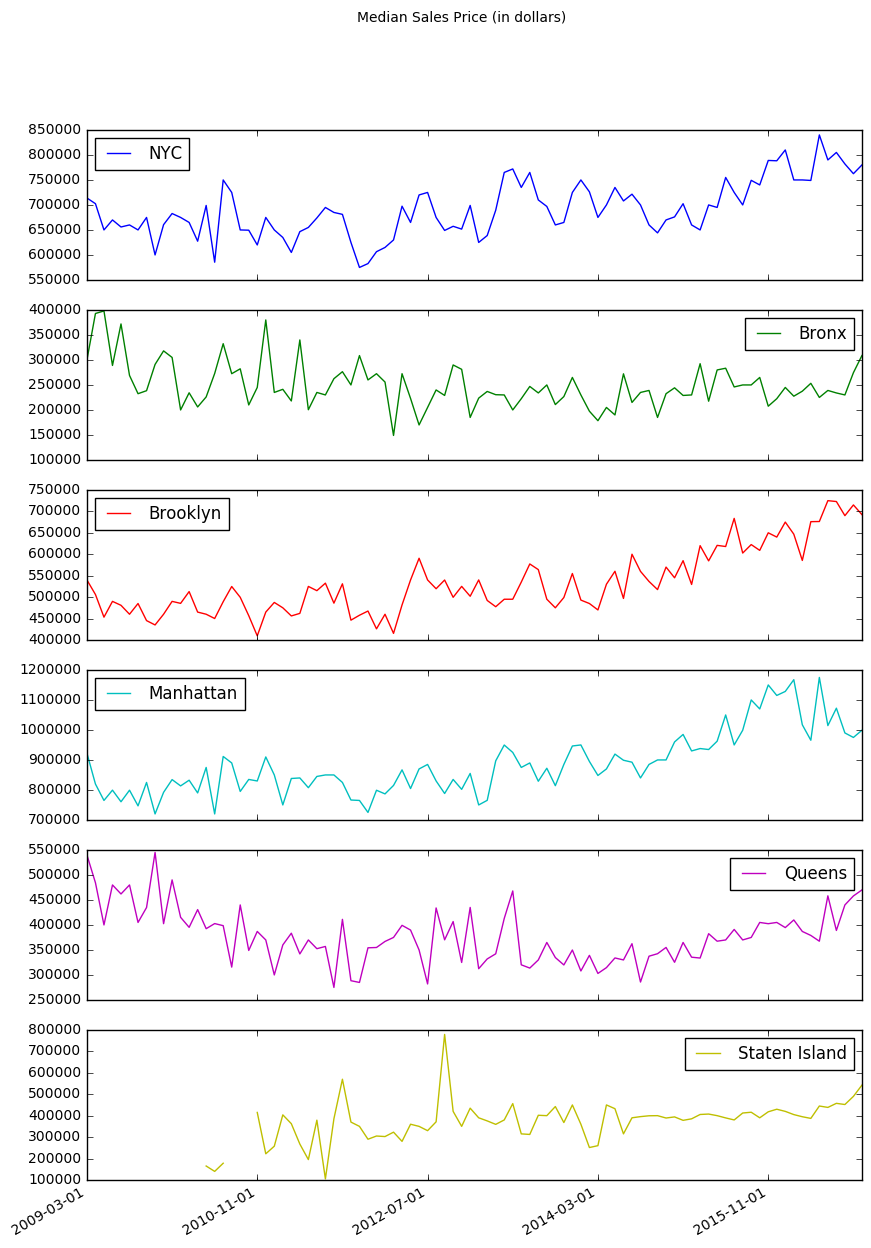

In [4]:
areaT.plot(subplots = True,
          figsize = (10,15),
          title = 'Median Sales Price (in dollars)')

In [5]:
# Median sales price growth rate
growth = areaT.pct_change()

Calculating the percent changes between periods gives us the growth rates. We see that the Bronx, Queens, and especially Staten Island experienced the highest volatility in growth rates, which accounts for their price dips. However, Brooklyn and Manhattan had very stable, non-negative growth rates, which is probably responsible for NYC's overall stability.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1186a6438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118e00d68>], dtype=object)

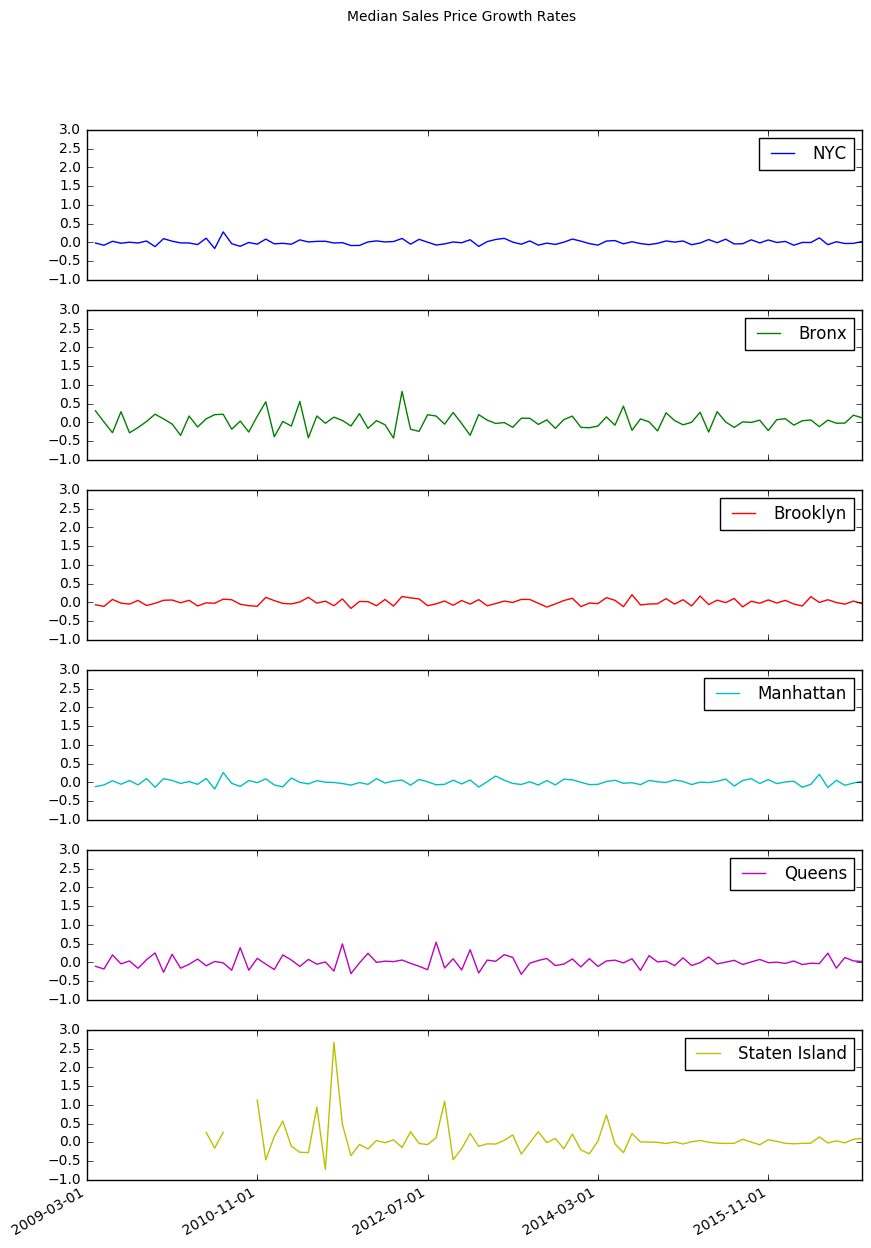

In [6]:
growth.plot(subplots = True,
           sharey = True,
           figsize = (10,15),
           title = 'Median Sales Price Growth Rates')


In [13]:
# Read in the Department of Buildings data
url3 = 'New_Buildings_-Building_Permit.csv'
url4 = url1 + url3
dob = pd.read_csv(url4)

In [14]:
dob = dob[['Permit_Issuance_Date', 'Borough']] # Select the columns we want
dob = dob.rename(columns = {'Permit_Issuance_Date': 'Issued Date'}) # Rename column
dob['Issued Date'] = dob['Issued Date'].str.replace('0:00','') # Remove the hours/minutes time
dob['Issued Date'] = pd.to_datetime(pd.Series(dob['Issued Date'])) # Set column to datetime format
dob['Issued Date'] = dob['Issued Date'].astype(str).str[:-3] # Select Year and Month values only to group monthly new construction
dob = dob.dropna()

In [15]:
# Create new dataframe with grouped construction
group = dob.groupby(['Issued Date', 'Borough']).size()
grp = group.to_frame()
grp = grp.unstack()

In [16]:
# Select rows after 2009 (to match with StreetEasy data)
d1 = '2009-03'
d2 = '2016-12'
crisis = grp.ix[d1:d2]

The following graphs show that Brooklyn and Queens experienced the highest levels of new residential permit issuances - consistently above 50 issuances per month. This might prove as an explanation for observed gentrification of these boroughs. However, the Bronx, Manhattan, and Staten Island have significantly lower levels of new residential permit issuances.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119791780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b66fef0>], dtype=object)

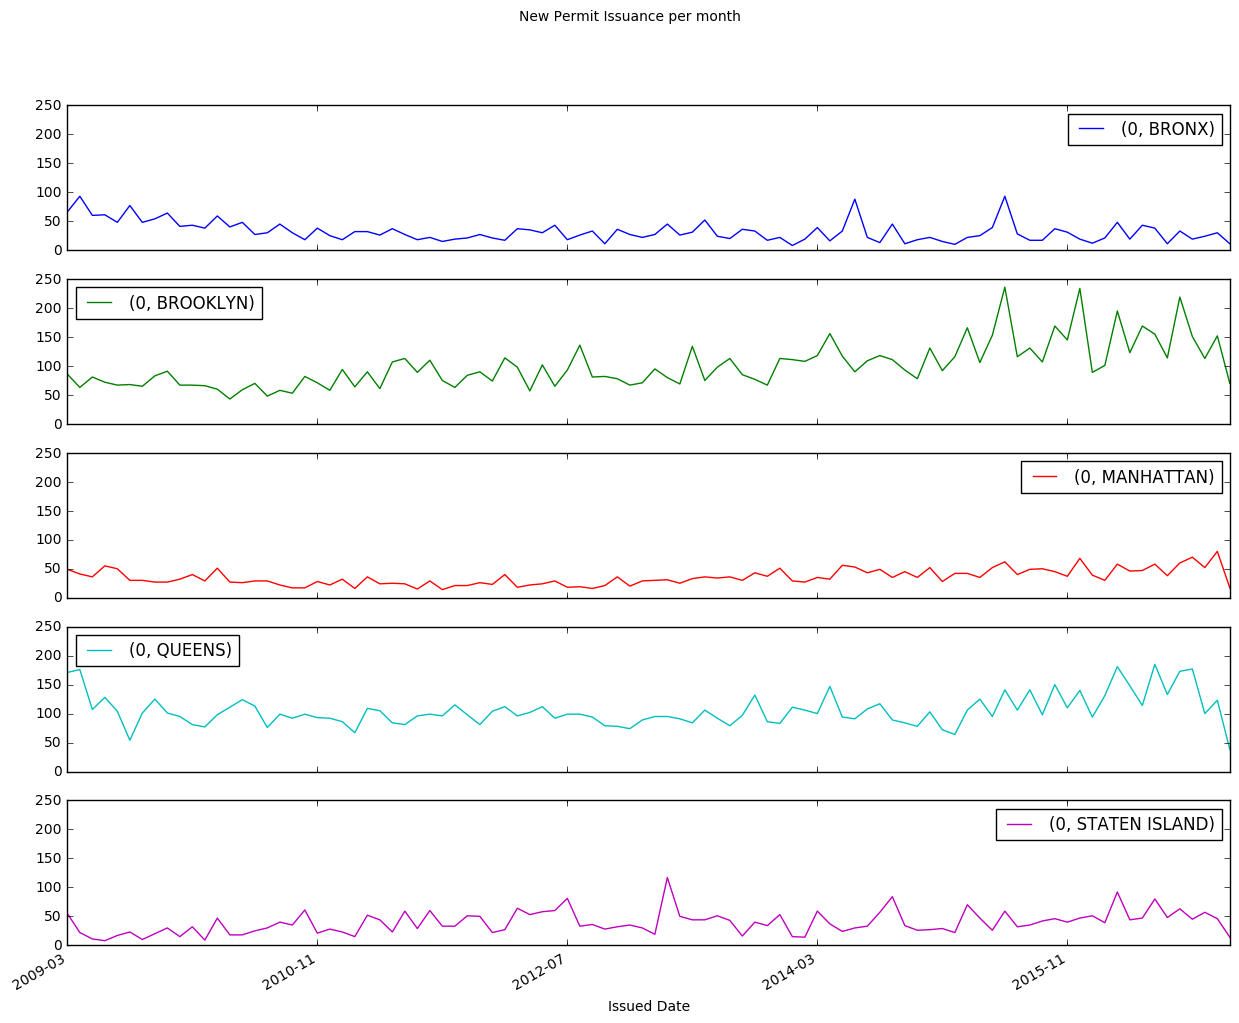

In [17]:
crisis.plot(subplots = True,
           figsize = (15,12),
           sharey = True,
           title = 'New Permit Issuance per month')

In [18]:
# Permit Issuance Growth Rates
growth2 = crisis.pct_change()

Plotting the data of new residential permit issuances reveals that the growth rates remained around zero, with higher fluctuations in the Bronx and Staten Island.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b5f00b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b566438>], dtype=object)

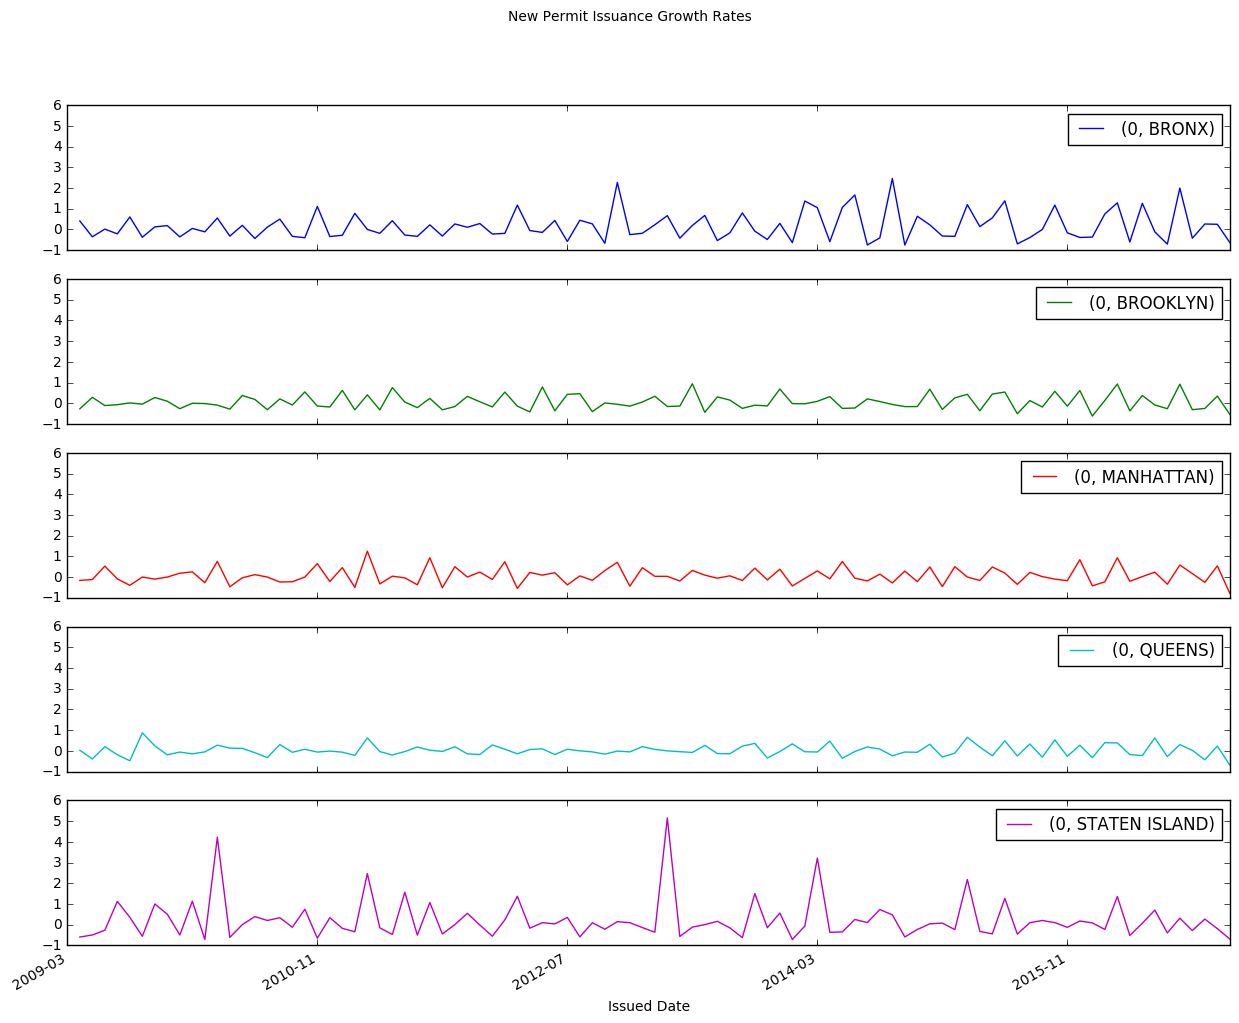

In [19]:
growth2.plot(subplots = True,
           figsize = (15,12),
           sharey = True,
            title = 'New Permit Issuance Growth Rates')

### Conclusion
We saw that the growth rates of Permit Issuance more or less remained around zero, with greater volatility in Staten Island and the Bronx. This is consistent with the fluctuations in median sales price growth rates.

A zero growth rate, however, does not discount the fact that new residential construction remains at a certain level (averaging around 100/month for Brooklyn and Queens, and less than 50/month for the other three boroughs). Similar growth rates for median sales price (~zero) reveal that new construction satisfies the housing demand and this helps to keep prices stable. Other market factors may impact price movements, but our median price - new construction analysis shows no major outliers or shocking trends.

Combining our findings with empirical evidence, we see draw an interesting conclusion: new construction meets the demand of housing from a median price standpoint. In particular, increasing construction meets the demand for residences in Brooklyn to maintain the rising prices. We would logically think of neighborhoods like Williamsburg and other hot areas in Brooklyn to justify this data.